In [1]:
import import_ipynb
import GraphGenerator as gg
import BruteForce as bf
import BruteForceOptimized as bfo
import AntColonyOptimized as aco
import vns as vns

import random
import copy
from matplotlib import pyplot as plt

importing Jupyter notebook from GraphGenerator.ipynb
importing Jupyter notebook from BruteForce.ipynb
importing Jupyter notebook from BruteForceOptimized.ipynb
importing Jupyter notebook from AntColonyOptimized.ipynb
importing Jupyter notebook from vns.ipynb


In [2]:
def plot(num_iterations, length_per_iteration):
    colors = ['xkcd:ruby', 'xkcd:gross green', 'xkcd:bright turquoise', 'xkcd:warm purple', 'xkcd:canary yellow']
    color = random.sample(colors, k=1)[0]
    plt.plot(range(1, num_iterations+1), length_per_iteration, color=color, label='Best Weight')

    indices = [i for i, value in enumerate(length_per_iteration) if value == -1]
    plt.scatter([i+1 for i in indices], [-1]*len(indices), marker='x', color='red', label='Solution not found')
    
    plt.xlabel('Iterations')
    plt.ylabel('Best Weight')
    plt.title('Shortest Number of Steps in Each Iteration')
    plt.legend()

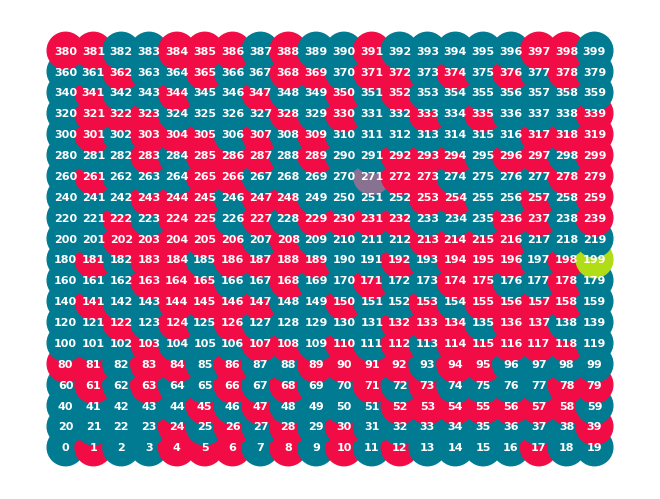

In [79]:
g, obstacles, start_pos, goal_pos = gg.build_grid(20)
# g, obstacles, start_pos, goal_pos = gg.build_graph(177)
obstacles_start = copy.deepcopy(obstacles)

# Brute Force:

In [80]:
metrics_bf = bf.find_path(g, start_pos, goal_pos, obstacles, num_iterations=1000)

The minimum length of 1178 was found in iteration 55
Time it took to finish the search: 30.04313
Obstacles moved: ['81->101', '122->121', '107->106', '203->182', '8->7', '117->138', '347->346', '204->226', '322->302', '265->325', '63->62', '195->235', '302->282', '215->236', '296->316', '62->82', '24->44', '124->104', '352->392', '273->252', '158->159', '386->387', '84->85', '108->109', '182->162', '28->29', '55->34', '333->332', '83->123', '162->182', '378->358', '339->338', '341->342', '388->348', '7->46', '78->77', '350->329', '186->185', '83->103', '309->308', '164->202', '136->96', '104->84', '294->274', '391->390', '73->72', '96->97', '194->193', '265->264', '236->235', '273->251', '46->27', '317->337', '307->306', '29->9', '387->367', '224->203', '153->154', '337->339', '299->298', '61->41', '339->338', '45->67', '27->28', '165->166', '67->87', '57->37', '306->267', '392->391', '248->228', '97->96', '251->250', '121->140', '329->309', '358->378', '132->153', '321->302', '166->18

# Optimized brute

In [81]:
obstacles = copy.deepcopy(obstacles_start)
metrics_bfo = bfo.find_path(g, start_pos, goal_pos, obstacles, num_iterations=1000)

Preskocena iteracija
The minimum length of 54 was found in iteration 772
Time it took to finish the search: 50.237255
Obstacles moved: ['122->142', '4->3', '142->162', '265->264', '239->219', '322->342', '287->267', '365->366', '341->361', '162->182', '95->96', '73->74', '144->143', '261->260', '24->4', '305->325', '94->93', '224->223', '53->33', '81->82', '330->310', '114->113', '165->185', '80->60', '299->298', '264->284', '28->29', '321->341', '307->327', '150->151', '369->370', '52->72', '134->114', '372->392', '225->226', '133->134', '124->125', '229->209', '91->111', '103->102', '96->97', '164->144', '108->109', '189->169', '230->250', '181->180', '223->224', '186->166', '111->131', '1->21', '93->94', '381->382', '125->124', '84->64', '388->389', '110->111', '134->135', '29->9', '325->305', '259->239', '174->154', '342->343', '47->27', '78->98', '289->290', '371->372', '361->360', '310->311', '284->264', '293->313', '278->277', '63->43', '116->96', '205->225', '384->364', '196->1

# ACO

In [82]:
alpha = 0.9
beta = 1.5
theta = 100
num_ants = 20
rho = 0.9

for edge in g.edges:
        g.edges[edge]['pheromones'] = round(random.uniform(1e-3, 1e-2), 4)
        g.edges[edge]['weight'] = 1
    
obstacles = copy.deepcopy(obstacles_start)
metrics_aco = aco.aco(g, start_pos, goal_pos, num_ants, rho, theta, alpha, beta, obstacles, num_iters = 50)

Best score: 21
Time it took to finish the search: 0.317874
Obstacles moved: ['352->332', '232->212', '318->338', '289->290', '278->298']
Best path: [271, 251, 252, 232, 233, 234, 235, 255, 256, 276, 277, 278, 258, 238, 218, 219, 199]


# VNS

In [83]:
obstacles = copy.deepcopy(obstacles_start)
vns_params = {
    'time_limit': 2,
    'k_min': 1,
    'k_max': 5,
    'move_prob': 0.23,
}
metrics_vns = vns.vns(g, start_pos, goal_pos, obstacles, vns_params, num_iters = 1000)

Best score: 17
Time it took to finish the search: 107.440614
Obstacles moved: ['257->256']
Best path: [271, 291, 311, 312, 313, 314, 315, 295, 275, 276, 277, 257, 258, 238, 218, 219, 199]


In [84]:
metrics = [metrics_bf, metrics_bfo, metrics_aco, metrics_vns]
name = ["bf", "bfo", "aco", "vns"]

In [85]:
best_values = [x["best_value"] for x in metrics]
times = [x["time"] for x in metrics]

In [86]:
def plot_metric(values, names, title):
    plt.figure(figsize=(14, 4))
    plt.bar(name, values)
    plt.grid(alpha = 0.5)
    
    for i, s in enumerate(values):
        plt.text(name[i], s, f'{s:.4f}', ha='center', va='bottom')
    
#     plt.ylim()
    plt.title(title)
    plt.show()

In [87]:
def plot_solutions():
    fig, axs = plt.subplots(2, 2, figsize = (10, 10))

    colors = ['xkcd:ruby', 'xkcd:gross green', 'xkcd:bright turquoise', 'xkcd:warm purple', 'xkcd:canary yellow']
    x = range(1, num_iterations+1)
    
    for i, ax in enumerate(axs.flat):
        
        indices = [j for j, value in enumerate(metrics[i]["solution_values"]) if value == -1]
        ax.scatter([j+1 for j in indices], [-1]*len(indices), marker='x', color='red', label='Solution not found')
            
        color = random.sample(colors, k=1)[0]
        colors.remove(color)

        ax.plot(range(1, len(metrics[i]["solution_values"])+1), metrics[i]["solution_values"], color = color)
        #ax.plot(x, metrics[i]["solution_values"], color = color)

        ax.set_title(name[i])
    
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Best Weight')
        if len(indices):
            ax.legend()
    
    plt.show()

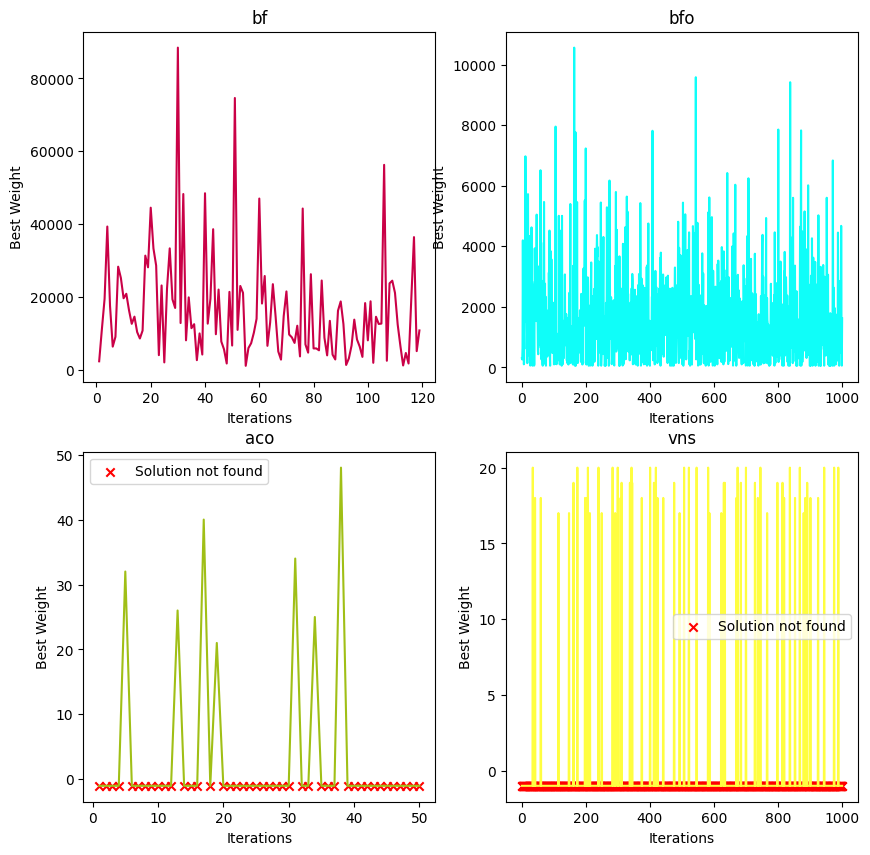

In [88]:
plot_solutions(num_iterations=100, ant_iterations=50)

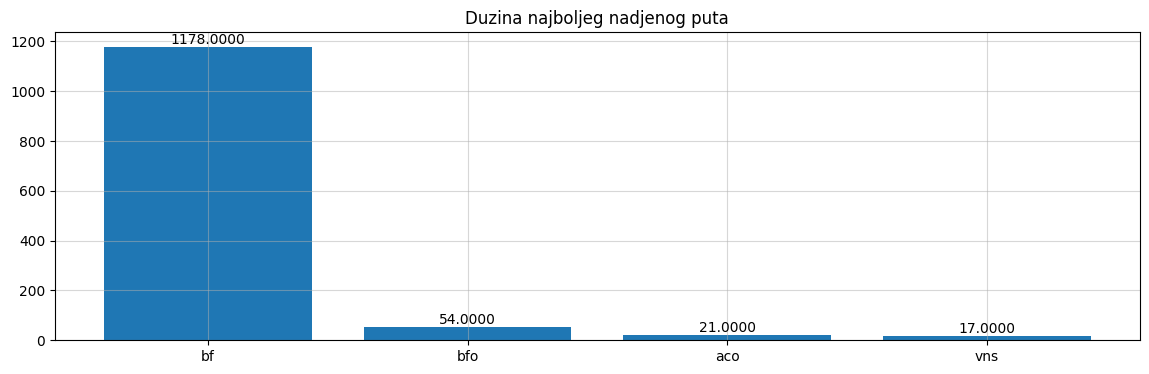

In [89]:
plot_metric(best_values, name, "Duzina najboljeg nadjenog puta")

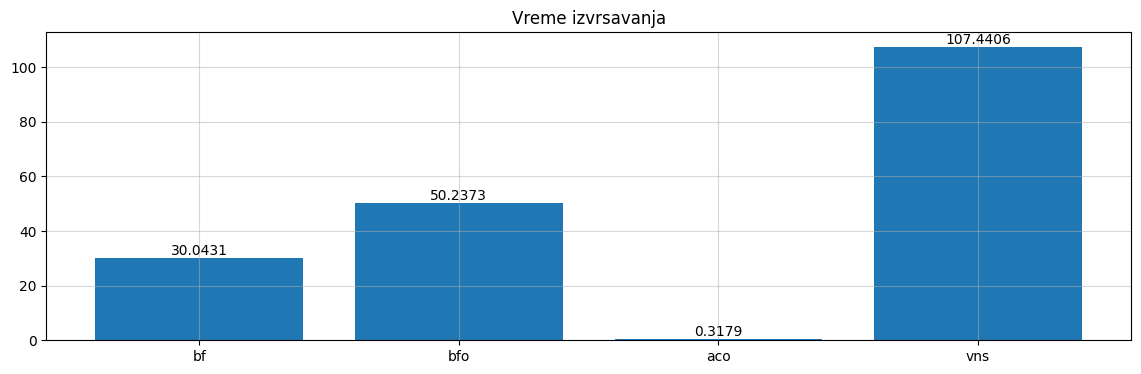

In [90]:
plot_metric(times, name, "Vreme izvrsavanja")